In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
normal = cv2.imread('data/chest_xray/test/NORMAL/IM-0003-0001.jpeg')

In [ ]:
normal.shape

(1509, 2111, 3)

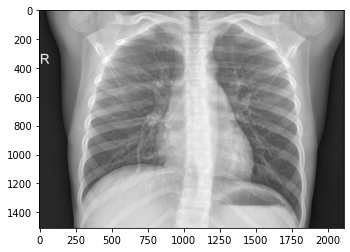

In [ ]:
plt.imshow(normal)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
imageGen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
            height_shift_range=0.1,shear_range=0.1, zoom_range=0.1,
            fill_mode='nearest', horizontal_flip=True, rescale= 1/255)

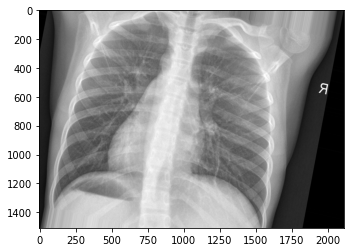

In [ ]:
plt.imshow(imageGen.random_transform(normal))

In [ ]:
imageGen.flow_from_directory('data/chest_xray/test')

Found 624 images belonging to 2 classes.


In [ ]:
imageGen.flow_from_directory('data/chest_xray/train')

Found 5216 images belonging to 2 classes.


In [ ]:
inputShape = (200,200,3)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = inputShape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = inputShape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = inputShape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [ ]:
batch_size = 32

In [ ]:
train_gen = imageGen.flow_from_directory('data/chest_xray/train',target_size=inputShape[:2],
                                        batch_size = batch_size,class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_gen = imageGen.flow_from_directory('data/chest_xray/test',target_size=inputShape[:2],
                                        batch_size = batch_size,class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
results = model.fit_generator(train_gen,epochs=20,steps_per_epoch=100,validation_data=test_gen,validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 67s 667ms/step - loss: 0.5346 - accuracy: 0.7534 - val_loss: 0.4292 - val_accuracy: 0.8021
Epoch 2/20
100/100 [==============================] - 64s 640ms/step - loss: 0.3354 - accuracy: 0.8459 - val_loss: 0.6107 - val_accuracy: 0.7214
Epoch 3/20
100/100 [==============================] - 63s 629ms/step - loss: 0.3542 - accuracy: 0.8366 - val_loss: 0.9307 - val_accuracy: 0.7109
Epoch 4/20
100/100 [==============================] - 62s 621ms/step - loss: 0.2920 - accuracy: 0.8741 - val_loss: 0.6369 - val_accuracy: 0.7318
Epoch 5/20
100/100 [==============================] - 61s 609ms/step - loss: 0.2667 - accuracy: 0.8894 - val_loss: 0.4403 - val_accuracy: 0.8099
Epoch 6/20
100/100 [==============================] - 61s 606ms/step - loss: 0.2669 - accuracy: 0.8838 - val_loss: 0.4768 - val_accuracy: 0.8073
Epoch 7/20
100/100 [==============================] - 

In [ ]:
type(results)

tensorflow.python.keras.callbacks.History

In [ ]:
print(results.history['accuracy'])

[0.7534375190734863, 0.8459374904632568, 0.8365625143051147, 0.8740624785423279, 0.8893749713897705, 0.8837500214576721, 0.8962500095367432, 0.9078124761581421, 0.9037500023841858, 0.9078124761581421, 0.9096875190734863, 0.9153125286102295, 0.926562488079071, 0.9300000071525574, 0.9234374761581421, 0.9290624856948853, 0.9293749928474426, 0.9309375286102295, 0.932812511920929, 0.9300000071525574]


In [ ]:
print(results.history['loss'])

[0.5346487164497375, 0.3353681266307831, 0.3541925847530365, 0.2919979393482208, 0.26671984791755676, 0.26692140102386475, 0.25255197286605835, 0.22988861799240112, 0.22358214855194092, 0.22456981241703033, 0.22829896211624146, 0.20920757949352264, 0.18996334075927734, 0.1946156919002533, 0.19011996686458588, 0.1876307874917984, 0.1853511780500412, 0.1812216341495514, 0.16960902512073517, 0.17327813804149628]


In [ ]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


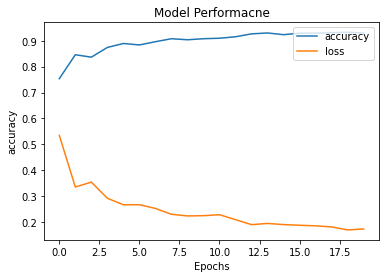

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('Model Performacne')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','loss'],loc='upper right')
plt.show()

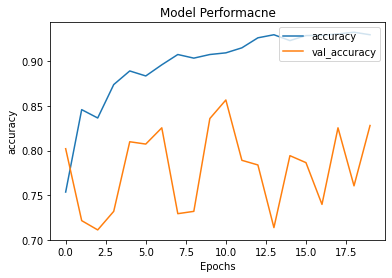

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performacne')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# Predictions

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
pneum_img = image.load_img('data/chest_xray/test/PNEUMONIA/person101_bacteria_484.jpeg',target_size=(200,200))

pneum_img = image.img_to_array(pneum_img)
print(pneum_img.shape)
pneum_img = np.expand_dims(pneum_img,axis=0)
print(pneum_img.shape)
pneum_img = pneum_img/255

(200, 200, 3)
(1, 200, 200, 3)


In [ ]:
predictions = model.predict(pneum_img)
print(f'Probability of that image having pneumonia is :{predictions}')

Probability of that image having pneumonia is :[[0.9926104]]


In [ ]:
model.save('chest_Xrays.h5')